Country Data Analysis

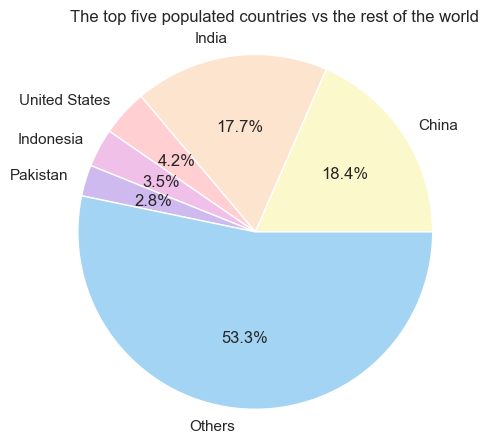

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1. create csv (this is the old one that only works for graphs 1, 2, and 5
countrydata1 = pd.read_csv("country.csv")

# removing N/A values
countrydata1['Population (2020)'] = pd.to_numeric(countrydata1['Population (2020)'], errors='coerce')
countrydata1 = countrydata1.dropna(subset=['Population (2020)'])

# sort data frame by pop
sorted_countrydata = countrydata1.sort_values('Population (2020)', ascending=False)

# get the populations and labels of the top 5 countries and the rest as a list of strings
populations = np.array([sorted_countrydata.loc[0, 'Population (2020)'],
                        sorted_countrydata.loc[1, 'Population (2020)'],
                        sorted_countrydata.loc[2, 'Population (2020)'],
                        sorted_countrydata.loc[3, 'Population (2020)'],
                        sorted_countrydata.loc[4, 'Population (2020)'],
                        sorted_countrydata.loc[5:, 'Population (2020)'].sum()])

labels = sorted_countrydata['Country (or dependency)'].head(5).tolist() + ['Others']
colors = ['#fbf8cc', '#fde4cf', '#ffcfd2', '#f1c0e8', '#cfbaf0', '#a3d4f3']

# plot the pie chart with labels and percentage values
plt.pie(populations, labels=labels, autopct='%.1f%%', colors=colors, radius=1.2)
plt.title(label="The top five populated countries vs the rest of the world\n", loc="left")
plt.show()


1. The top five countries together have 46.7% of the world's population.




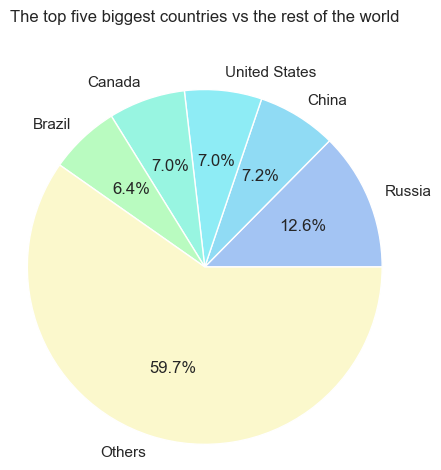

In [284]:
#2. Create a pie chart displaying the top ten biggest countries and the rest of the world

# removing N/A values
countrydata1['Land Area (Km²)'] = pd.to_numeric(countrydata1['Land Area (Km²)'], errors='coerce')
countrydata1 = countrydata1.dropna(subset=['Land Area (Km²)'])

# sort data frame by area
sorted_countrydata = countrydata1.sort_values(by='Land Area (Km²)', ascending=False)


# get the area and labels of the top 5 countries and the rest as a list of strings
landarea = np.array([sorted_countrydata.iloc[0]['Land Area (Km²)'],
                        sorted_countrydata.iloc[1]['Land Area (Km²)'],
                        sorted_countrydata.iloc[2]['Land Area (Km²)'],
                        sorted_countrydata.iloc[3]['Land Area (Km²)'],
                        sorted_countrydata.iloc[4]['Land Area (Km²)'],
                        sorted_countrydata.iloc[5:]['Land Area (Km²)'].sum()])
                     
labels = sorted_countrydata['Country (or dependency)'].head(5).tolist() + ['Others']
colors = ['#a3c4f3', '#90dbf4', '#8eecf5', '#98f5e1', '#b9fbc0', '#fbf8cc']

# plot the pie chart with labels and percentage values
plt.pie(landarea, labels=labels, autopct='%.1f%%', colors=colors, radius=1.2)
plt.title(label="The top five biggest countries vs the rest of the world\n\n\n")
plt.show()

2. The top five largest countries together have 40.3% of the world's land mass.




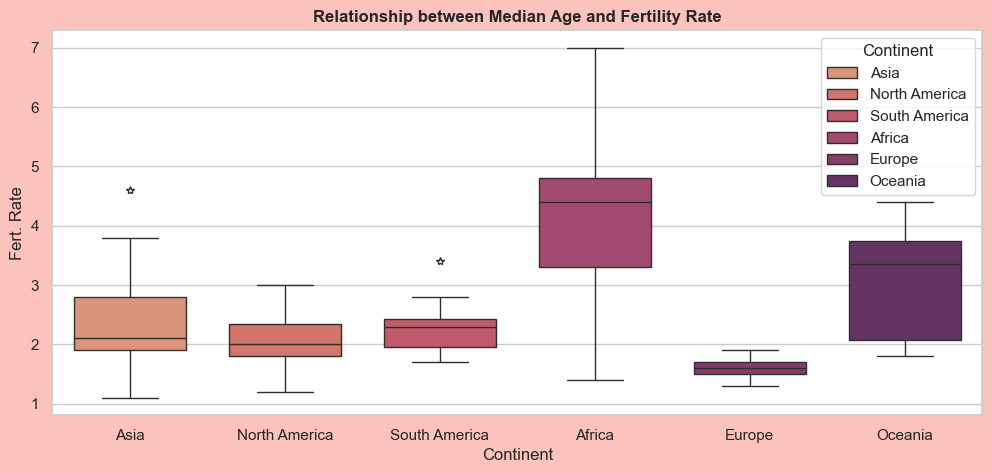

In [285]:
# 3. Create a box plot showing the relationship between Median Age and Fertility Rate
# Med. Age and Fert. Rate

# a new (xlsx) file for all but 1, 2, 5. Edited the data to remove the extra stuff in the category names and added a column named 'Continent'
countrydata = pd.read_excel('country.xlsx', engine='openpyxl')

fig = plt.figure(figsize=(12, 5))
fig.set_facecolor('#fbc3bc')

countrydata['Med. Age'] = pd.to_numeric(countrydata['Med. Age'], errors='coerce')
countrydata = countrydata.dropna(subset=['Med. Age'])

sns.set(style='whitegrid')
plt.title('Relationship between Median Age and Fertility Rate', fontweight='bold')

ax = sns.boxplot(data=countrydata, x="Continent", y="Fert. Rate", 
                 palette="flare", hue="Continent", flierprops={"marker": "*"}, 
                 gap=0.1
                )


3. The continent with the highest median fertility rate is Africa while the continent with the lowest median fertility rate is Europe.




In [ ]:
# 4. Create a line plot showing the relationship between Land Area and Density
fig = plt.figure()
fig.set_facecolor('#800f2f')

# dropping N/A values from Land Area and Density...
countrydata['Land Area'] = pd.to_numeric(countrydata['Land Area'], errors='coerce')
countrydata = countrydata.dropna(subset=['Land Area'])
countrydata['Density'] = pd.to_numeric(countrydata['Density'], errors='coerce')
countrydata = countrydata.dropna(subset=['Density'])

# adding color and formatting the graph
palette = sns.color_palette("husl", 6)
fig = plt.figure(figsize=(12, 5), facecolor='#F5D3C8')

# the lineplot
sns.lineplot(data=countrydata, x='Land Area', y='Density', hue="Continent",
                style="Continent", palette=palette, lw=3
            )

# title
plt.title('Relationship between Land Area and Density', fontweight='bold')

# logged values to make values appear neater
plt.yscale('log')
plt.xscale('log')



4. There is a negative relationship between Density and Land Area. Asia appears to have the highest density on average out of all of the continents.




In [ ]:
# 5. Create a swarm plot displaying the Median Age

# making the figure an object to alter features
fig = plt.figure()
fig.set_facecolor('#d5b9b2')

# removing N/A values
countrydata1['Med. Age'] = pd.to_numeric(countrydata1['Med. Age'], errors='coerce')
countrydata1 = countrydata1.dropna(subset=['Med. Age'])

# swarm plot
sns.swarmplot(x=countrydata1['Med. Age'], hue = countrydata1['Med. Age'], 
              palette = 'blend:#355070,#6d597a,#b56576,#e56b6f,#eaac8b', 
              legend = False, size=7)

# title and xlabel
plt.title('Median Age of World Countries Distribution', fontweight='bold')
plt.xlabel('Median Age')


5. The median age that popped up the most was 19, with 13 countries reporting to have that median age.




In [ ]:
# 6. Create a bar graph of the top ten countries with the greatest negative yearly change
# Net Change #, Yearly Change %

# removing N/A values
countrydata['Net Change'] = pd.to_numeric(countrydata['Net Change'], errors='coerce')
countrydata = countrydata.dropna(subset=['Net Change'])
countrydata['Yearly Change'] = pd.to_numeric(countrydata['Yearly Change'], errors='coerce')
countrydata = countrydata.dropna(subset=['Yearly Change'])

# sorting countries by Net Change
sorted_countrydata = countrydata.sort_values('Net Change')

# make list of top countries by net change's actual net change
change = np.array([sorted_countrydata.iloc[0]['Net Change'],
                        sorted_countrydata.iloc[1]['Net Change'],
                        sorted_countrydata.iloc[2]['Net Change'],
                        sorted_countrydata.iloc[3]['Net Change'],
                        sorted_countrydata.iloc[4]['Net Change'],
                        sorted_countrydata.iloc[5]['Net Change'],
                        sorted_countrydata.iloc[6]['Net Change'],
                        sorted_countrydata.iloc[7]['Net Change'],
                        sorted_countrydata.iloc[8]['Net Change'],
                        sorted_countrydata.iloc[9]['Net Change']                  
                        ])

# names of the countries with the highest net change put into list
labels = sorted_countrydata['Country'].head(10).tolist()

# figure configuration
fig = plt.figure(figsize=(12, 5), facecolor='#bdc4a7')

# bar plot
sns.barplot(x=labels, y=change, hue=labels, legend=None,
            palette='blend:#ff0000,#ffd300,#a1ff0a,#0aefff,#580aff,#be0aff')

# title
plt.title('Countries with the greatest negative yearly change', fontsize=13, fontweight='bold')



6. The top ten countries with the greatest negative yearly change in population are Japan, Ukraine, Romania, Italy, Venezuela, Puerto Rico, Bulgaria, Greece, Poland, Lithuania.




In [ ]:
# 7. Find the categories with the greatest correlation

# removing the % from Urban Pop Category
countrydata['Urban Pop %'] = countrydata['Urban Pop %'].astype(str)
countrydata['Urban Pop %'] = countrydata['Urban Pop %'].str.replace('%', '')

# removing N/A values
countrydata['Urban Pop %'] = pd.to_numeric(countrydata['Urban Pop %'], errors='coerce')

# all the categories
heat = countrydata[['Population', 'Yearly Change', 'Net Change', 'Density', 'Land Area', 'Migrants', 'Fert. Rate', 'Med. Age', 'Urban Pop %']]

# figure configuration
fig = plt.figure(facecolor='#F5F5F5')

#title
plt.title('Category Correlation',  fontweight='bold')

# heatmap
sns.heatmap(heat.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize":8})




7. The most highly correlated categories in the dataset are Population and Net Change, early Change and Fertility Rate, Yearly Change and Median Age, Fertility Rate and Median Age.




In [ ]:
# 8. Create a scatterplot showing the relationship between Urban population and Median Age

# figure configuration
fig = plt.figure(facecolor='#6BFFB8')

# title
plt.title('Relationship between Urban Population and Median Age',  fontweight='bold', 
         backgroundcolor='#ADFFD7')

# scatterplot
sns.scatterplot(x=countrydata['Med. Age'], y=countrydata['Fert. Rate'], hue=countrydata['Continent'], palette='husl')


8. There is a negative relationship between Fertility Rate and Median Age.




In [ ]:
# 9. Create an enhanced box plot showing the Urban Pop % of each continent

# figure configuration
fig = plt.figure(facecolor='#D5ECD4')

# title
plt.title('Relationship between Urban Population and Median Age',  fontweight='bold', 
         backgroundcolor='#C3DAC3')

# enhanced box plot
sns.boxenplot(data=countrydata, x='Urban Pop %', y='Continent', hue='Continent', legend=False, palette='crest')

9. The continent with the highest Urban Population % is South America, while the continent with the lowest % is Oceania.




In [ ]:
# 10. Display the current and future world population with a bar graph
# Graph 2020

# figure configuration
fig = plt.figure(figsize=(12, 5), facecolor='#D3CDD7')

# barplot
ax = sns.barplot(data = countrydata, x='Continent', y='Population', hue='Continent',
                 estimator = 'sum', palette='blend:#6930c3,#4ea8de,#72efdd', 
                 errorbar=None, legend=False)

# labeling values for each bar
for container in ax.containers:
    ax.bar_label(container, labels = ['{:,}'.format(int(v.get_height())) for v in container], fontsize=10)

# formatting values to look more readable
total = countrydata["Population"].sum()
total = int(total)
total_str = "{:,}".format(total)

# title
plt.title(f"2020 Current Population: {total_str}", fontweight='bold')


In [ ]:
# Graph 2050

# figure configuration
fig = plt.figure(figsize=(12, 5), facecolor='#9FABA4')

# calculating future percentage
countrydata["Future Population"] = countrydata["Population"] * np.exp(countrydata["Yearly Change"]*50)

# barplot
ax = sns.barplot(data = countrydata, x='Continent', y='Future Population',
                 estimator = 'sum', palette='blend:#007f5f,#55a630,#aacc00,#d4d700,#ffff3f', hue='Continent', 
                 errorbar=None, legend=False)

# labeling values for each bar
for container in ax.containers:
    ax.bar_label(container, labels = ['{:,}'.format(int(v.get_height())) for v in container], fontsize=10)

# formatting values to look more readable
total = countrydata["Future Population"].sum()
total = int(total)
total_str = "{:,}".format(total)

# title
plt.title(f"2050 Estimated Population: {total_str}", fontweight='bold')


10. The 2050 world population will be nearly double that of the 2020 world population.